# Analyse des données des élections de 1965 à 2012
## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset sur la participation

In [2]:
link = 'https://raw.githubusercontent.com/h4r1c0t/WildCodeSchool/master/Project/Datathon%231/Datasets/data_participation_1965-2012.csv'
dfP = pd.read_csv(link, index_col = False)
dfP.drop('Unnamed: 0', axis = 1, inplace = True)

### Dataset sur les scores

In [3]:
link = 'https://raw.githubusercontent.com/h4r1c0t/WildCodeSchool/master/Project/Datathon%231/Datasets/data_scores_1965-2012.csv'
dfSc = pd.read_csv(link, index_col = False)
dfSc.drop('Unnamed: 0', axis = 1, inplace = True)

## Exploration et visualisation des données
### Participation

In [4]:
dfP.head()

,Date,Tour,Code département,département,Blancs et nuls,Exprimés,Inscrits,Votants,Abstention,Votants (%),Abstention (%),Année
0,1965-12-05,1.0,1,AIN,1431.0,165555.0,206496.0,166986.0,39510.0,80.87,19.13,1965
1,1965-12-05,1.0,10,AUBE,1435.0,130280.0,153423.0,131715.0,21708.0,85.85,14.15,1965
2,1965-12-05,1.0,11,AUDE,2096.0,146993.0,173977.0,149089.0,24888.0,85.69,14.31,1965
3,1965-12-05,1.0,12,AVEYRON,2189.0,157076.0,189045.0,159265.0,29780.0,84.25,15.75,1965
4,1965-12-05,1.0,13,BOUCHES-DU-RHONE,5828.0,603841.0,750783.0,609669.0,141114.0,81.20,18.80,1965


### Scores

In [5]:
dfSc.head()

,Candidats,Orientation,Date,Tour,Code département,département,Score,Année,Score (%)
0,BALLADUR (UDF),droite,1995-04-23,1.0,1,AIN,48264.0,1995,19.80
1,CHEMINADE (POE),sans,1995-04-23,1.0,1,AIN,686.0,1995,0.28
2,CHIRAC (RPR),droite,1995-04-23,1.0,1,AIN,46891.0,1995,19.23
3,DE VILLIERS (MPF),droite,1995-04-23,1.0,1,AIN,13118.0,1995,5.38
4,HUE (PCF),gauche,1995-04-23,1.0,1,AIN,14999.0,1995,6.15


In [6]:
dfSc[dfSc['Score (%)'] > 100]

,Candidats,Orientation,Date,Tour,Code département,département,Score,Année,Score (%)


Il y a une erreur sur le score de POMPIDOU pour le 1er tour de 1969. En calculant par raport aux autres scores, on obtient un score de 

In [7]:
tab1 = pd.pivot_table(dfSc, values = ['Score'], 
                      index = ['Année', 'Tour', 'Orientation'], 
                      aggfunc = np.sum).reset_index()
tab1.head(4)

,Année,Tour,Orientation,Score
0,1965,1.0,droite,15821153.0
1,1965,1.0,gauche,7936445.0
2,1965,2.0,droite,13084560.0
3,1965,2.0,gauche,12741053.0


In [8]:
tab2 = pd.pivot_table(dfSc, values = ['Score'], 
                      index = ['Année', 'Tour'], 
                      aggfunc = np.sum).reset_index()
tab2.head(4)

,Année,Tour,Score
0,1965,1.0,23757598.0
1,1965,2.0,25825613.0
2,1969,1.0,22431180.0
3,1969,2.0,18547214.0


In [9]:
tab1 = tab1.merge(tab2, left_on = ['Année', 'Tour'], right_on = ['Année', 'Tour'], suffixes = ['', '_total'])

tab1['Score (%)'] = round(tab1['Score'] / tab1['Score_total'] * 100, 2)

tab1.head(4)

,Année,Tour,Orientation,Score,Score_total,Score (%)
0,1965,1.0,droite,15821153.0,23757598.0,66.59
1,1965,1.0,gauche,7936445.0,23757598.0,33.41
2,1965,2.0,droite,13084560.0,25825613.0,50.67
3,1965,2.0,gauche,12741053.0,25825613.0,49.33


## Visualisation des taux de participations en fonction du temps

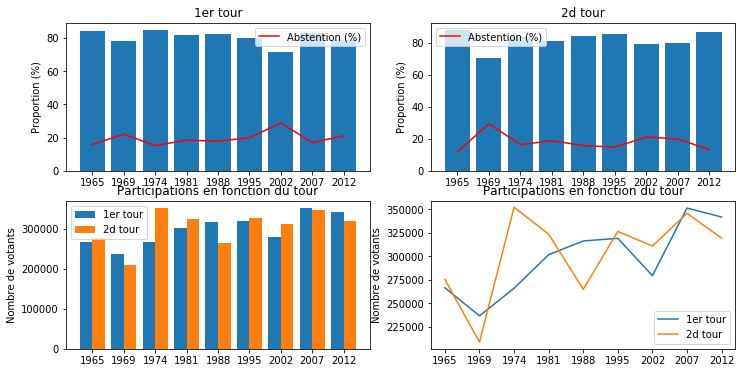

In [11]:
plt_data = dfP.groupby(by = ['Année', 'Tour']).mean().reset_index()
plt_data['Année'] = plt_data['Année'].astype(str)

fig = plt.subplots(figsize = (12, 6))
ax1 = plt.subplot(221)
ax1.bar('Année', 'Votants (%)', data = plt_data[plt_data['Tour'] == 1])
ax1.plot('Année', 'Abstention (%)', data = plt_data[plt_data['Tour'] == 1], color = 'r')
ax1.set_title('1er tour')
ax1.set_ylabel('Proportion (%)')
ax1.legend()

ax2 = plt.subplot(222)
ax2.bar('Année', 'Votants (%)', data = plt_data[plt_data['Tour'] == 2])
ax2.plot('Année', 'Abstention (%)', data = plt_data[plt_data['Tour'] == 2], color = 'r')
ax2.set_title('2d tour')
ax2.set_ylabel('Proportion (%)')
ax2.legend()

ax3 = plt.subplot(223)
ax3.bar('Année', 'Votants', data = plt_data[plt_data['Tour'] == 1], width = -.4, align = 'edge', label = '1er tour')
ax3.bar('Année', 'Votants', data = plt_data[plt_data['Tour'] == 2], width = .4, align = 'edge', label = '2d tour')
ax3.set_title('Participations en fonction du tour')
ax3.set_ylabel('Nombre de votants')
ax3.legend()

ax4 = plt.subplot(224)
ax4.plot('Année', 'Votants', data = plt_data[plt_data['Tour'] == 1], label = '1er tour')
ax4.plot('Année', 'Votants', data = plt_data[plt_data['Tour'] == 2], label = '2d tour')
ax4.set_title('Participations en fonction du tour')
ax4.set_ylabel('Nombre de votants')
ax4.legend()

plt.show()

## Visualisation des scores en fonction de l'orientation politique (tous départements confondus)

/home/h4r1c0t/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


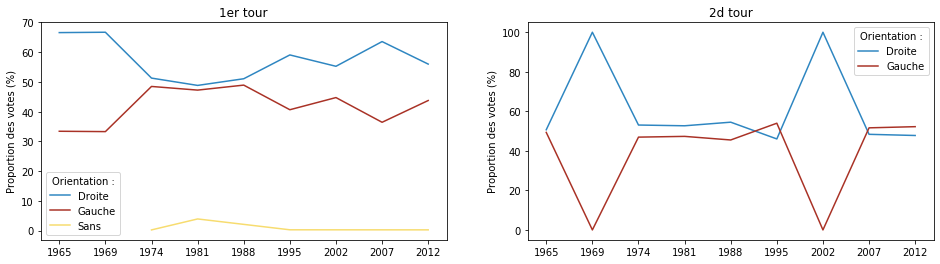

In [12]:
fig = plt.subplots(figsize = (16, 4))

plt_data = tab1[tab1['Tour'] == 1]
plt_data['Année'] = plt_data['Année'].astype(str)

ax1 = plt.subplot(121)
ax1.plot('Année', 'Score (%)', data = plt_data[plt_data['Orientation'] == 'droite'], label = 'Droite', color = '#2E86C1')
ax1.plot('Année', 'Score (%)', data = plt_data[plt_data['Orientation'] == 'gauche'], label = 'Gauche', color = '#A93226')
ax1.plot('Année', 'Score (%)', data = plt_data[plt_data['Orientation'] == 'sans'], label = 'Sans', color = '#F7DC6F')
ax1.set_title('1er tour')
ax1.set_ylabel('Proportion des votes (%)')
ax1.legend(title = 'Orientation :')

plt_data = tab1[tab1['Tour'] == 2]
# Ajout des lignes manquantes pour 1969 et 2002 (2d tour uniquement droite)
add = pd.DataFrame({'Année':[1969, 2002], 'Tour':[2, 2], 'Orientation':['gauche', 'gauche'], 'Score':[0, 0], 'Score_total':[0, 0], 'Score (%)':[0, 0]})
plt_data = plt_data.append(add).reset_index().sort_values(['Année', 'Tour', 'Orientation']).drop('index', axis = 1)
plt_data['Année'] = plt_data['Année'].astype(str)

ax2 = plt.subplot(122)
ax2.plot('Année', 'Score (%)', data = plt_data[plt_data['Orientation'] == 'droite'], label = 'Droite', color = '#2E86C1')
ax2.plot('Année', 'Score (%)', data = plt_data[plt_data['Orientation'] == 'gauche'], label = 'Gauche', color = '#A93226')
ax2.set_title('2d tour')
ax2.set_ylabel('Proportion des votes (%)')
ax2.legend(title = 'Orientation :')

plt.show()

## Visualisation et prédiction des scores par départements et/ou régions

In [13]:
dfSc

,Candidats,Orientation,Date,Tour,Code département,département,Score,Année,Score (%)
0,BALLADUR (UDF),droite,1995-04-23,1.0,1,AIN,48264.0,1995,19.80
1,CHEMINADE (POE),sans,1995-04-23,1.0,1,AIN,686.0,1995,0.28
2,CHIRAC (RPR),droite,1995-04-23,1.0,1,AIN,46891.0,1995,19.23
3,DE VILLIERS (MPF),droite,1995-04-23,1.0,1,AIN,13118.0,1995,5.38
4,HUE (PCF),gauche,1995-04-23,1.0,1,AIN,14999.0,1995,6.15
...,...,...,...,...,...,...,...,...,...
10726,SARKOZY (UMP),droite,1974-05-19,2.0,987,SAINT PIERRE ET MIQUELON,1378.0,1974,39.14
10727,ROYAL (PS),gauche,1974-05-19,2.0,988,WALLIS-ET-FUTUNA,3840.0,1974,49.83
10728,SARKOZY (UMP),droite,1974-05-19,2.0,988,WALLIS-ET-FUTUNA,3866.0,1974,50.17
10729,ROYAL (PS),gauche,1974-05-19,2.0,99,FRANCAIS DE L'ETRANGER,156480.0,1974,46.01


### Evolution des scores en fonction de l'orientation politique

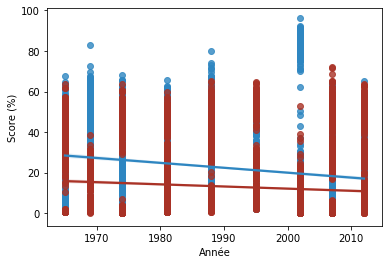

In [16]:
import seaborn as sns
ax = sns.regplot('Année', 'Score (%)', data = dfSc[dfSc['Orientation'] == 'droite'], color = '#2E86C1') 
ax = sns.regplot('Année', 'Score (%)', data = dfSc[dfSc['Orientation'] == 'gauche'], color = '#A93226')

plt.show()

**New plot here** 

Refaire un plot ici avec les projections des courbes pour 2017

### Evolution des scores en fonction de l'orientation politique et du tour

/home/h4r1c0t/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/h4r1c0t/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


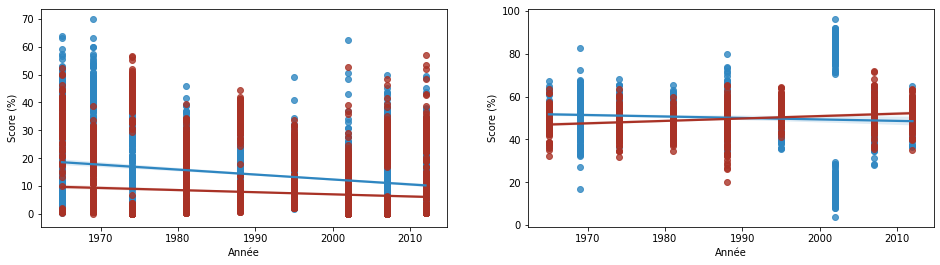

In [15]:
fig = plt.subplots(figsize = (16, 4))

plt_data = dfSc[dfSc['Tour'] == 1]
plt_data.sort_values(['Année'], inplace = True)
ax1 = plt.subplot(121)
ax1 = sns.regplot('Année', 'Score (%)', data = plt_data[plt_data['Orientation'] == 'droite'], color = '#2E86C1') 
ax1 = sns.regplot('Année', 'Score (%)', data = plt_data[plt_data['Orientation'] == 'gauche'], color = '#A93226')

plt_data = dfSc[dfSc['Tour'] == 2]
plt_data.sort_values(['Année'], inplace = True)
ax2 = plt.subplot(122)
ax2 = sns.regplot('Année', 'Score (%)', data = plt_data[plt_data['Orientation'] == 'droite'], color = '#2E86C1') 
ax2 = sns.regplot('Année', 'Score (%)', data = plt_data[plt_data['Orientation'] == 'gauche'], color = '#A93226')

plt.show()

## Prédictions des scores par des modèles de régression multiples

In [27]:
from sklearn.linear_model import LinearRegression
data_droite = dfSc[dfSc['Orientation'] == 'droite']
Xd = data_droite[['Année', 'Tour']]
yd = data_droite['Score (%)'] 
modelLR_droite = LinearRegression().fit(Xd, yd)

data_gauche = dfSc[dfSc['Orientation'] == 'gauche']
Xg = data_gauche[['Année', 'Tour']]
yg = data_gauche['Score (%)'] 
modelLR_gauche = LinearRegression().fit(Xg, yg)

print('Score pour les partis de droite :', modelLR_droite.score(Xd, yd))
print('Score pour les partis de gauche :', modelLR_gauche.score(Xg, yg))

Score pour les partis de droite : 0.5840366142493244
Score pour les partis de gauche : 0.6433800671746271
